In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/NYCTaxiFares.csv')

In [ ]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
df['fare_amount'].describe()

,fare_amount
count,120000.000000
mean,10.040326
std,7.500134
min,2.500000
25%,5.700000
50%,7.700000
75%,11.300000
max,49.900000


In [ ]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [ ]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [ ]:
my_time = df['pickup_datetime'][0]

In [ ]:
my_time.hour

8

In [ ]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [ ]:
df['Hour'] = df['EDTdate'].dt.hour

In [ ]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [ ]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [ ]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [ ]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [ ]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [ ]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [ ]:
y_col = ['fare_amount']

In [ ]:
df.dtypes

,0
pickup_datetime,"datetime64[ns, UTC]"
fare_amount,float64
fare_class,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
dist_km,float64
EDTdate,"datetime64[ns, UTC]"


In [ ]:
for cat in cat_cols:
  df[cat] = df[cat].astype('category')

In [ ]:
df.dtypes

,0
pickup_datetime,"datetime64[ns, UTC]"
fare_amount,float64
fare_class,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
dist_km,float64
EDTdate,"datetime64[ns, UTC]"


In [ ]:
df['Hour'].head()

,Hour
0,4
1,11
2,7
3,17
4,22


In [ ]:
df['AMorPM'].head()

,AMorPM
0,am
1,am
2,am
3,pm
4,pm


In [ ]:
df['Weekday'].head()

,Weekday
0,Mon
1,Sat
2,Sat
3,Sun
4,Fri


In [ ]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [ ]:
df['AMorPM'].cat.codes

,0
0,0
1,0
2,0
3,1
4,1
...,...
119995,0
119996,0
119997,1
119998,0


In [ ]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [ ]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [ ]:
hour = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
weekday = df['Weekday'].cat.codes.values

In [ ]:
cats = np.stack([hour,ampm,weekday],axis=1)

In [ ]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [ ]:
cats = torch.tensor(cats,dtype=torch.int64)

In [ ]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [ ]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [ ]:
conts = torch.tensor(conts,dtype=torch.float)

In [ ]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [ ]:
y = torch.tensor(df[y_col].values,dtype=torch.float)

In [ ]:
cats.shape

torch.Size([120000, 3])

In [ ]:
conts.shape

torch.Size([120000, 6])

In [ ]:
y.shape

torch.Size([120000, 1])

In [ ]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [ ]:
cat_szs

[24, 2, 7]

In [ ]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [ ]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [ ]:
catz = cats[:2]

In [ ]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [ ]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [ ]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [ ]:
# FORARD METHOD (cats)

embeddingz = []
for i,e in enumerate(selfembeds):
  embeddingz.append(e(catz[:,i]))

In [ ]:
embeddingz

[tensor([[-0.0460, -0.1135, -0.5309,  0.0459, -0.3731,  0.9714, -0.1164, -0.6633,
           0.5498, -0.7349, -0.8708, -0.3060],
         [-0.5495, -0.6871,  0.4229, -0.7238, -1.1099, -0.1546,  0.7748, -1.4238,
          -0.0310,  0.9241,  0.0816, -0.4370]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3171],
         [-0.3171]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.0071, -0.8278, -0.9592,  0.3076],
         [ 0.1039,  0.8417,  0.8135,  1.1294]], grad_fn=<EmbeddingBackward0>)]

In [ ]:
z = torch.cat(embeddingz,1)

In [ ]:
z

tensor([[-0.0460, -0.1135, -0.5309,  0.0459, -0.3731,  0.9714, -0.1164, -0.6633,
          0.5498, -0.7349, -0.8708, -0.3060, -0.3171, -1.0071, -0.8278, -0.9592,
          0.3076],
        [-0.5495, -0.6871,  0.4229, -0.7238, -1.1099, -0.1546,  0.7748, -1.4238,
         -0.0310,  0.9241,  0.0816, -0.4370, -0.3171,  0.1039,  0.8417,  0.8135,
          1.1294]], grad_fn=<CatBackward0>)

In [ ]:
selfembdrop = nn.Dropout(0.4)

In [ ]:
z = selfembdrop(z)

In [ ]:
z

tensor([[-0.0000, -0.1891, -0.8848,  0.0000, -0.0000,  1.6189, -0.1939, -0.0000,
          0.9164, -1.2248, -1.4513, -0.5099, -0.5285, -0.0000, -0.0000, -1.5987,
          0.5126],
        [-0.0000, -0.0000,  0.0000, -0.0000, -0.0000, -0.2577,  0.0000, -0.0000,
         -0.0000,  1.5401,  0.1360, -0.0000, -0.0000,  0.0000,  0.0000,  1.3559,
          1.8824]], grad_fn=<MulBackward0>)

In [ ]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [ ]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
batch_size = 10000
test_size = int(batch_size*0.2)

In [ ]:
# DATA SHUFFLED ALREADY
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
cont_train = conts[:batch_size-test_size]
cont_test = conts[batch_size-test_size:batch_size]

In [ ]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [ ]:
len(cat_train)

8000

In [ ]:
len(cont_train)

8000

In [ ]:
len(cat_test)

2000

In [ ]:
len(y_test)

2000

In [ ]:
import time
start_time = time.time()
epochs = 300
losses = []
for i in range(epochs):
  i+=1
  y_pred = model(cat_train,cont_train)
  loss = torch.sqrt(criterion(y_pred,y_train))
  losses.append(loss)
  if i%10==1:
    print(f'Epoch: {i} Loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

Epoch: 1 Loss: 12.379914283752441
Epoch: 11 Loss: 11.526897430419922
Epoch: 21 Loss: 10.965904235839844
Epoch: 31 Loss: 10.623891830444336
Epoch: 41 Loss: 10.331242561340332
Epoch: 51 Loss: 10.104745864868164
Epoch: 61 Loss: 9.918336868286133
Epoch: 71 Loss: 9.733755111694336
Epoch: 81 Loss: 9.494922637939453
Epoch: 91 Loss: 9.30041790008545
Epoch: 101 Loss: 9.070712089538574
Epoch: 111 Loss: 8.782176971435547
Epoch: 121 Loss: 8.463512420654297
Epoch: 131 Loss: 8.130769729614258
Epoch: 141 Loss: 7.758543491363525
Epoch: 151 Loss: 7.320438385009766
Epoch: 161 Loss: 6.894526958465576
Epoch: 171 Loss: 6.385169982910156
Epoch: 181 Loss: 5.941042423248291
Epoch: 191 Loss: 5.46525239944458
Epoch: 201 Loss: 5.02910041809082
Epoch: 211 Loss: 4.636908531188965
Epoch: 221 Loss: 4.320631504058838
Epoch: 231 Loss: 4.102738857269287
Epoch: 241 Loss: 3.9162659645080566
Epoch: 251 Loss: 3.9305508136749268
Epoch: 261 Loss: 3.875554084777832
Epoch: 271 Loss: 3.8218576908111572
Epoch: 281 Loss: 3.755158

Text(0.5, 0, 'Epoch')

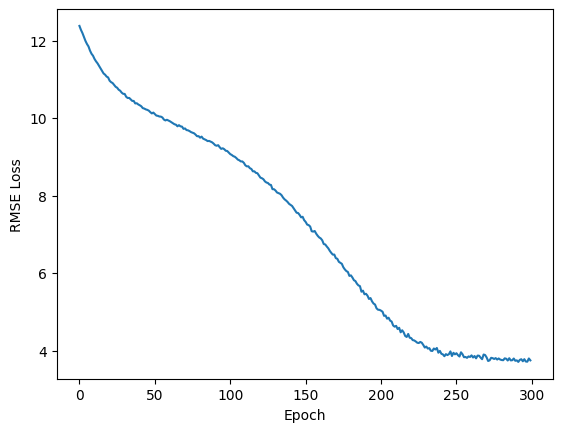

In [ ]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('RMSE Loss')
plt.xlabel('Epoch')

In [ ]:
with torch.no_grad():
  y_val = model(cat_test, cont_test)
  loss = torch.sqrt(criterion(y_val,y_test))

In [ ]:
loss

tensor(3.9525)

In [ ]:
for i in range(10):
  diff = np.abs(y_val[i].item() - y_test[i].item())
  print(f'{i}.)  PREDICTED {y_val[i].item():8.2f}   TRUE {y_test[i].item():8.2f}  DIFF {diff:8.2f}')

0.)  PREDICTED     5.12   TRUE     4.50  DIFF     0.62
1.)  PREDICTED     7.18   TRUE     7.30  DIFF     0.12
2.)  PREDICTED     6.60   TRUE     6.10  DIFF     0.50
3.)  PREDICTED     7.07   TRUE     8.50  DIFF     1.43
4.)  PREDICTED     6.86   TRUE     3.70  DIFF     3.16
5.)  PREDICTED    11.41   TRUE    11.30  DIFF     0.11
6.)  PREDICTED     3.21   TRUE     6.90  DIFF     3.69
7.)  PREDICTED    11.87   TRUE    11.70  DIFF     0.17
8.)  PREDICTED     6.78   TRUE     6.50  DIFF     0.28
9.)  PREDICTED     7.58   TRUE     7.30  DIFF     0.28


In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/Deep_learning-datasets/TaxiModel.pt')